In [1]:
# Sampurna Panjiwinata 52019034 TI 2019

from sklearn import datasets
import numpy as np
import pandas as pd
import io

In [2]:
from google.colab import files

uploaded= files.upload()

Saving global air pollution dataset.csv to global air pollution dataset.csv


In [3]:
polusi = pd.read_csv(io.BytesIO(uploaded["global air pollution dataset.csv"]))

polusi.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [11]:
X = polusi.iloc[:,[4,5,6,7,8,9]]
X= pd.get_dummies(X, prefix=['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category'], columns=['CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category'])
y = polusi['AQI Category']

print ("Label kelas: ", np.unique(y))

Label kelas:  ['Good' 'Hazardous' 'Moderate' 'Unhealthy'
 'Unhealthy for Sensitive Groups' 'Very Unhealthy']


In [12]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X)
X= sc.transform(X)
print(X[0:5,:])

[[-0.2010711   0.02869554 -0.58304831  0.01130828 -0.00923298 -0.00652856
   0.33708553 -0.25617986 -0.13253076 -0.14619797 -0.0475814   0.02529256
  -0.02529256]
 [-0.2010711  -1.07458094 -0.39271701  0.01130828 -0.00923298 -0.00652856
   0.33708553 -0.25617986 -0.13253076 -0.14619797 -0.0475814   0.02529256
  -0.02529256]
 [-0.2010711   0.13546423 -0.2023857   0.01130828 -0.00923298 -0.00652856
   0.33708553 -0.25617986 -0.13253076 -0.14619797 -0.0475814   0.02529256
  -0.02529256]
 [-0.2010711  -0.04248359 -0.58304831  0.01130828 -0.00923298 -0.00652856
   0.33708553 -0.25617986 -0.13253076 -0.14619797 -0.0475814   0.02529256
  -0.02529256]
 [-0.74691529 -0.46955836 -0.58304831  0.01130828 -0.00923298 -0.00652856
   0.33708553 -0.25617986 -0.13253076 -0.14619797 -0.0475814   0.02529256
  -0.02529256]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size= 0.3, random_state= 0)

print("X training: ", X_train[0:5,:])
print("Y training: ", y_train[0:5])

X training:  [[-2.01071104e-01  2.86955363e-02 -5.83048311e-01  1.13082818e-02
  -9.23297667e-03 -6.52856128e-03  3.37085531e-01 -2.56179863e-01
  -1.32530762e-01 -1.46197970e-01 -4.75814013e-02  2.52925564e-02
  -2.52925564e-02]
 [-2.01071104e-01 -6.47506177e-01  3.68608212e-01  1.13082818e-02
  -9.23297667e-03 -6.52856128e-03  3.37085531e-01 -2.56179863e-01
  -1.32530762e-01 -1.46197970e-01 -4.75814013e-02  2.52925564e-02
  -2.52925564e-02]
 [ 8.90617269e-01  4.54857015e+00 -5.83048311e-01  1.13082818e-02
  -9.23297667e-03 -6.52856128e-03 -2.96660612e+00 -2.56179863e-01
   7.54541804e+00 -1.46197970e-01 -4.75814013e-02  2.52925564e-02
  -2.52925564e-02]
 [-2.01071104e-01 -7.89864432e-01 -2.02385702e-01  1.13082818e-02
  -9.23297667e-03 -6.52856128e-03  3.37085531e-01 -2.56179863e-01
  -1.32530762e-01 -1.46197970e-01 -4.75814013e-02  2.52925564e-02
  -2.52925564e-02]
 [ 1.43646146e+00  4.86887622e+00 -3.92717006e-01  1.13082818e-02
  -9.23297667e-03 -6.52856128e-03 -2.96660612e+00 -2.

In [15]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [16]:
# print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Bias model :  [ 0.85614922 -0.13578328  0.55250466  0.38031164  0.93821438 -0.92155656
 -0.99987942 -0.96371475 -0.87673842  1.10869218  0.95343285  1.18760661
 -0.29841461  0.99418901  1.18490512]
Indeks Support Vector :  [    0     1     3 ... 16219 16406 16419]
Support vector :  [[-0.2010711   0.02869554 -0.58304831 ... -0.0475814   0.02529256
  -0.02529256]
 [-0.2010711  -0.64750618  0.36860821 ... -0.0475814   0.02529256
  -0.02529256]
 [-0.2010711  -0.78986443 -0.2023857  ... -0.0475814   0.02529256
  -0.02529256]
 ...
 [10.16996844 -1.25252876  4.55589691 ... -0.0475814   0.02529256
  -0.02529256]
 [ 6.34905913 -1.14576007  0.74927082 ... -0.0475814   0.02529256
  -0.02529256]
 [ 0.34477308  5.90097357  0.36860821 ... 21.01661517  0.02529256
  -0.02529256]]
Jumlah support vector:  [4587  121 5471 1242 1086  157]
Nilai alpha :  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.00510221e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00

In [17]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['Unhealthy' 'Good' 'Good' ... 'Good' 'Good' 'Unhealthy']


Akurasi : 60.63361272908083 %


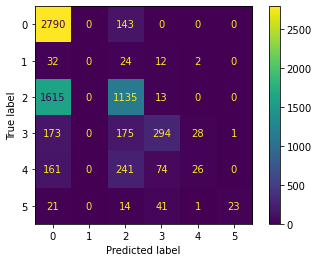

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))